In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
import spacy
# import unicodedata
# import contractions

from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# from contractions import CONTRACTION_MAP
from nltk.stem import WordNetLemmatizer
from nltk.corpus import brown
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string

from scipy.special import k0
to_be_disabled = ['tok2vec', 'tagger', 'parser',
 'attribute_ruler', 'transformer']

In [3]:
CNN = pd.read_csv(r'CNN_Articles.csv')

CNN.head(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...


In [4]:
CNN['Article text']

0         (CNN)Right now, there's a shortage of truck d...
1         (CNN)Working in a factory or warehouse can me...
2         (CNN)In a Hong Kong warehouse, a swarm of aut...
3        The pandemic thrust the working world into a n...
4        New York (CNN Business)March Madness isn't jus...
                               ...                        
37944     (CNN)Russian President Vladimir Putin has bee...
37945    Lviv, Ukraine (CNN)A long line of men snakes o...
37946     (CNN)Major League Baseball (MLB) is postponin...
37947    Here's a look at the life of Mikhail Gorbachev...
37948     (CNN)Here's a look at the life of Her Royal H...
Name: Article text, Length: 37949, dtype: object

In [5]:
# Display the full text of 10 records from the 'Article text' column
for index, article_text in CNN['Article text'].head(10).items():
    print(f"Record {index + 1}:")
    print(article_text)
    print("=" * 50) 

Record 1:
 (CNN)Right now, there's a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world's largest truck manufacturers -- Navistar in the US and Traton, Volkswagen's trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world's first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through t

In [6]:
print(type(CNN['Article text']))

<class 'pandas.core.series.Series'>


In [7]:
# Convert the 'Article text' Series to string type
CNN['Article text'] = CNN['Article text'].astype(str)

# Verify the data type conversion
print(type(CNN['Article text'][0]))  # Output should be <class 'str'>


<class 'str'>


In [8]:
# Convert the 'Article text' Series to string type
CNN['Article text'] = CNN['Article text'].astype(str)

# Verify the data type conversion
print(type(CNN['Article text'][0]))  # Output should be <class 'str'>


<class 'str'>


In [9]:
# Calculate word counts for Headline and Information columns
CNN['Text_Word_Count'] = CNN['Article text'].apply(lambda x: len(x.split()))

# Display the top 10 word counts for Headline and Information
top_n = 10
top_information = CNN.nlargest(top_n, 'Text_Word_Count')[['Article text', 'Text_Word_Count']]

print("\nTop 10 Article text Word Counts:")
print(top_information)



Top 10 Article text Word Counts:
                                            Article text  Text_Word_Count
33075  Marseille, France (CNN)At first, the front lin...            17556
32373   (CNN)As the coronavirus pandemic spreads acro...            17466
7856    (CNN)Why is the death rate so low in Germany?...            17354
33845   (CNN)Covid-19 is spreading faster than ever b...            17335
32315  London (CNN)It's said the coronavirus does not...            17277
34085  London (CNN)Boris Johnson might not be fully a...            17274
32386  London (CNN)A man who worked for the UK's Nati...            17147
32393   (CNN)As the coronavirus pandemic spreads acro...            17102
33791   (CNN)When the British-Swedish drugmaker Astra...            17073
32597  London (CNN)European Commission President Ursu...            17036


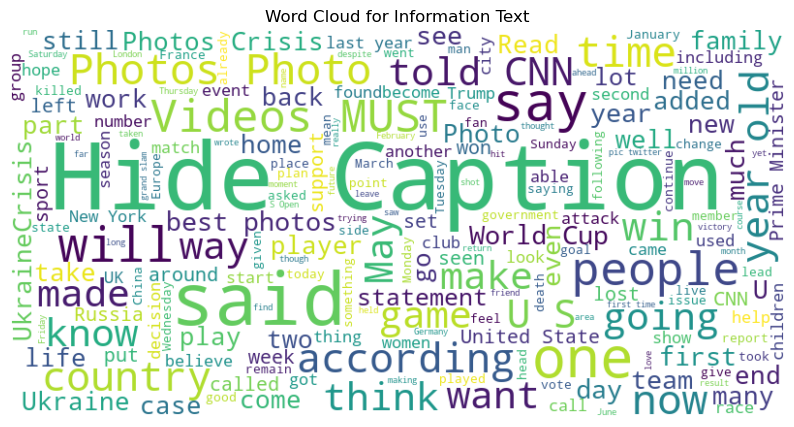

In [10]:
# Word cloud for Article text
info_text = ' '.join(CNN['Article text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(info_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Information Text')
plt.axis('off')
plt.show()

In [11]:
# Convert each article text to lowercase and collect in a list called 'words'
words = [word.lower() for article in CNN['Article text'] for word in article.split()]

# Create a Counter object to count the frequency of each word
c = Counter(words)

print(c.most_common(10))

[('the', 2020294), ('of', 1016709), ('to', 923329), ('in', 862845), ('a', 802909), ('and', 744723), ('on', 358956), ('for', 317142), ('that', 304251), ('is', 267301)]


In [12]:

stopwords = set(nltk.corpus.stopwords.words('english'))

# Tokenize each article text, convert to lowercase, and filter out stopwords
words = [word.lower() for article in CNN['Article text'] for word in article.split() if word.lower() not in stopwords]

c = Counter(words)
print(c.most_common(10))

[('photos:', 197461), ('caption', 163639), ('--', 130238), ('said', 109984), ('–', 72405), ('one', 70297), ('first', 64971), ('world', 63540), ('people', 62900), ('would', 57180)]


In [13]:
word_tokens_list = [word_tokenize(article) for article in CNN['Article text']]

# specifying dtype=object, you inform NumPy that you're intentionally creating an array of objects, each of which can have a different structure or length.
words = np.array(word_tokens_list)

print(words[1])

C:\Users\user\AppData\Local\Temp\ipykernel_12656\311306268.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  words = np.array(word_tokens_list)


['(', 'CNN', ')', 'Working', 'in', 'a', 'factory', 'or', 'warehouse', 'can', 'mean', 'doing', 'the', 'same', 'task', 'over', 'and', 'over', ',', 'and', 'that', 'repetition', 'can', 'lead', 'to', 'chronic', 'injury', '.', 'Now', ',', 'a', 'battery-powered', 'glove', 'could', 'help', 'workers', 'by', 'taking', 'some', 'of', 'the', 'strain.The', '``', 'Ironhand', "''", 'glove', 'strengthens', 'the', 'wearer', "'s", 'grip', ',', 'meaning', 'they', 'do', "n't", 'have', 'to', 'use', 'as', 'much', 'force', 'to', 'perform', 'repetitive', 'manual', 'tasks', '.', 'Its', 'developer', ',', 'Bioservo', ',', 'says', 'it', 'can', 'increase', 'the', 'wearer', "'s", 'hand', 'strength', 'by', '20', '%', '.', 'The', 'Swedish', 'company', 'describes', 'the', 'system', 'as', 'a', '``', 'soft', 'exoskeleton', '.', "''", 'Exoskeletons', 'are', 'an', 'external', 'device', 'that', 'supports', 'and', 'protects', 'the', 'body', ',', 'typically', 'increasing', 'strength', 'and', 'endurance', '.', 'Most', 'have', 

In [14]:
words_lower = np.array([[word.lower() for word in article] for article in words])

print(words_lower[1])

['(', 'cnn', ')', 'working', 'in', 'a', 'factory', 'or', 'warehouse', 'can', 'mean', 'doing', 'the', 'same', 'task', 'over', 'and', 'over', ',', 'and', 'that', 'repetition', 'can', 'lead', 'to', 'chronic', 'injury', '.', 'now', ',', 'a', 'battery-powered', 'glove', 'could', 'help', 'workers', 'by', 'taking', 'some', 'of', 'the', 'strain.the', '``', 'ironhand', "''", 'glove', 'strengthens', 'the', 'wearer', "'s", 'grip', ',', 'meaning', 'they', 'do', "n't", 'have', 'to', 'use', 'as', 'much', 'force', 'to', 'perform', 'repetitive', 'manual', 'tasks', '.', 'its', 'developer', ',', 'bioservo', ',', 'says', 'it', 'can', 'increase', 'the', 'wearer', "'s", 'hand', 'strength', 'by', '20', '%', '.', 'the', 'swedish', 'company', 'describes', 'the', 'system', 'as', 'a', '``', 'soft', 'exoskeleton', '.', "''", 'exoskeletons', 'are', 'an', 'external', 'device', 'that', 'supports', 'and', 'protects', 'the', 'body', ',', 'typically', 'increasing', 'strength', 'and', 'endurance', '.', 'most', 'have', 

C:\Users\user\AppData\Local\Temp\ipykernel_12656\838076968.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  words_lower = np.array([[word.lower() for word in article] for article in words])


In [15]:
default_stopwords = set(stopwords.words('english'))

custom_stopwords = set(['say','said','caption','hide','photo','photos', 'video','videos','must','cnn','tell','told'])

all_stopwords = default_stopwords.union(custom_stopwords)

flattened_RSW_words = [word for sublist in RSW_words for word in sublist]

def remove_stopwords(tokens):
    return [word for word in tokens if word not in all_stopwords]

# Example usage
filtered_words = remove_stopwords(flattened_RSW_words)
print(filtered_words) 

AttributeError: 'set' object has no attribute 'words'

In [ ]:
flattened_words = [word if isinstance(word, str) else str(word) for sublist in RSW_words for word in sublist]

text_for_wordcloud = ' '.join(flattened_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Information Text')
plt.axis('off')
plt.show()
